<a href="https://colab.research.google.com/github/zakomayo/Customer-Segmentation/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Segmentation

Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# EDA

In [5]:
#load data
df = pd.read_csv("/content/Mall_Customers.xls")

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There are 5 variables and 200 observations.

In [8]:
df.shape

(200, 5)

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



Some observations:
*   Minimum age is 18. Maximum age is 70. Probably only adults can be members.
*   Minumum annual income is 13k.  max income is 137k.



In [11]:
df.describe(include='O') # describe object datatypes

,Gender
count,200
unique,2
top,Female
freq,112


More females than malesa are members.

In [12]:
list(df.Gender.unique())

['Male', 'Female']

In [13]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing values.

In [14]:
df[df.duplicated(keep='first')]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


No duplicated values.

# Data Viz

Univariate Analysis

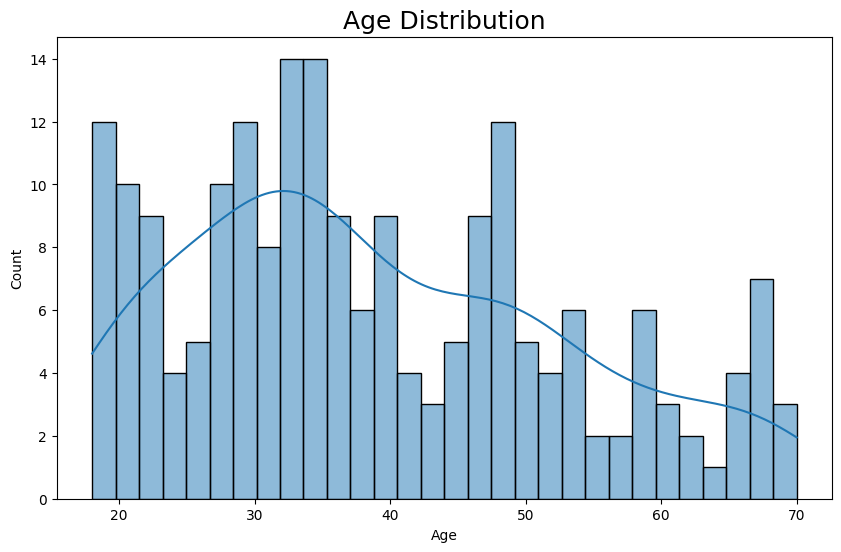

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df.Age, bins = 30, kde = True)
plt.title('Age Distribution',size=18)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

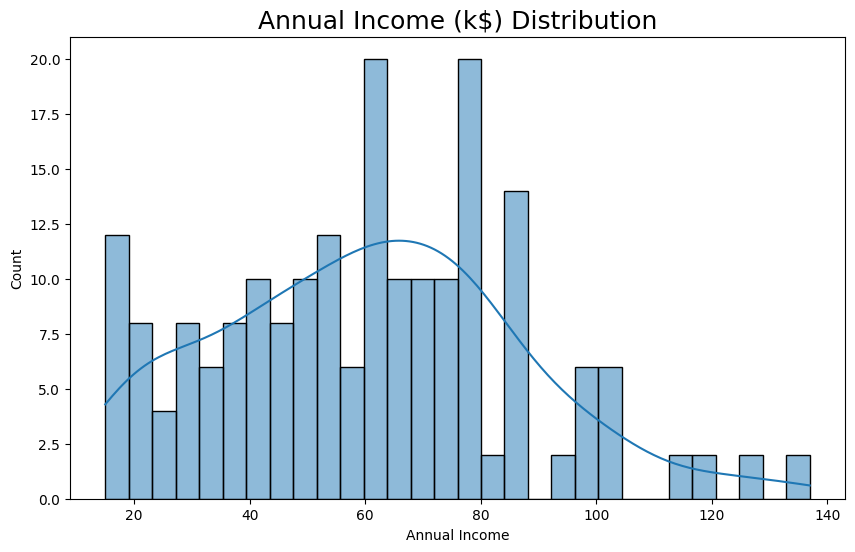

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['Annual Income (k$)'], bins = 30, kde = True)
plt.title('Annual Income (k$) Distribution',size=18)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

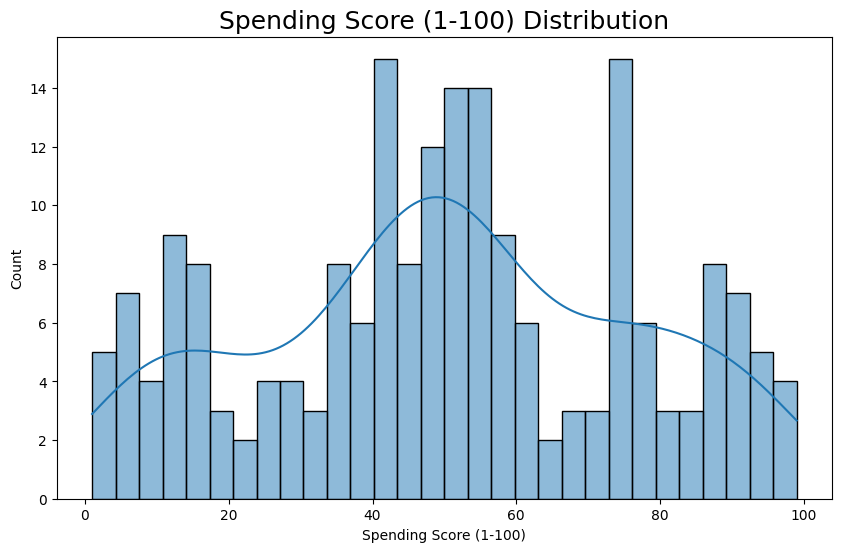

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(df['Spending Score (1-100)'], bins = 30, kde = True)
plt.title('Spending Score (1-100) Distribution',size=18)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()



1.   Age and Annual income are right-skewed distribution.
2.   Spending score is symmetric distribution.



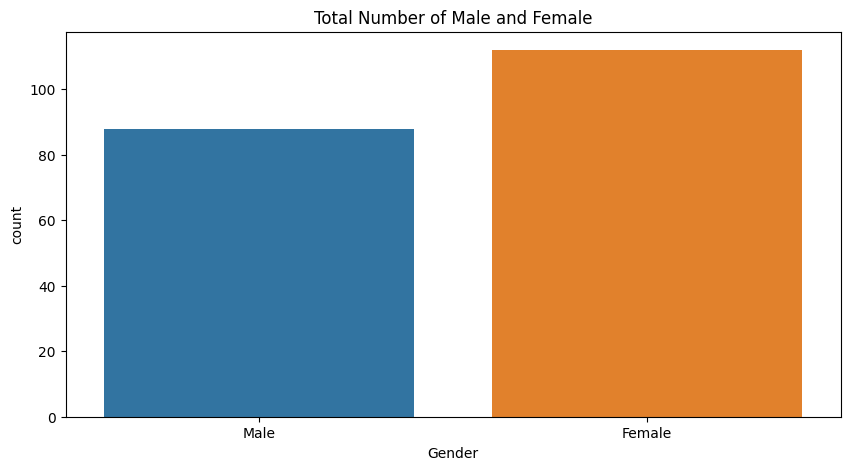

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Gender', data = df, )
plt.title('Total Number of Male and Female')
plt.xlabel('Gender')
plt.show()

More females than males.

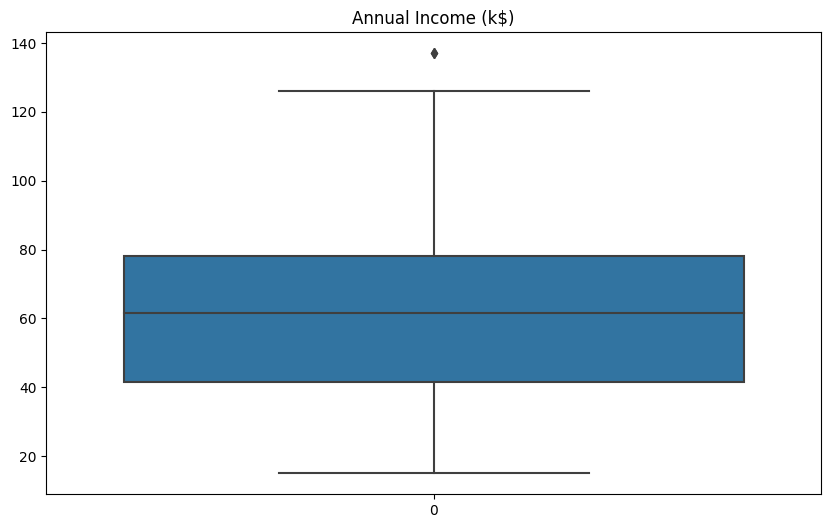

In [19]:
#boxplot
plt.figure(figsize = (10,6))
sns.boxplot(df['Annual Income (k$)'])
plt.title('Annual Income (k$)')
plt.show()

In [20]:
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

36.5


In [21]:
df[(df['Annual Income (k$)']< Q1-1.5* IQR) | (df['Annual Income (k$)']> Q3+1.5* IQR)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


These two customers are outliers.

<ipython-input-24-73902dce8f22>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='RdBu')


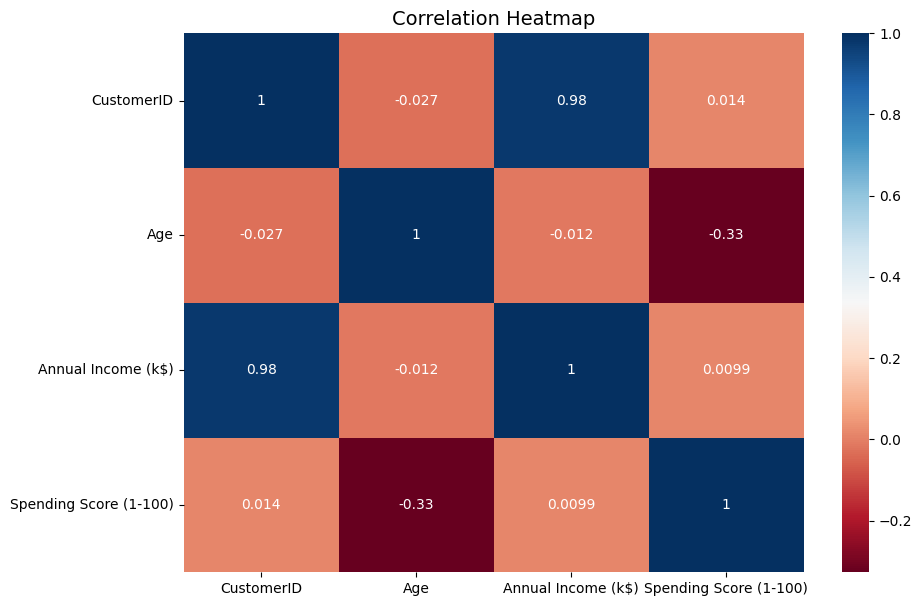

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

- Age and spending score have negative correlation.
- others are too minor to count.

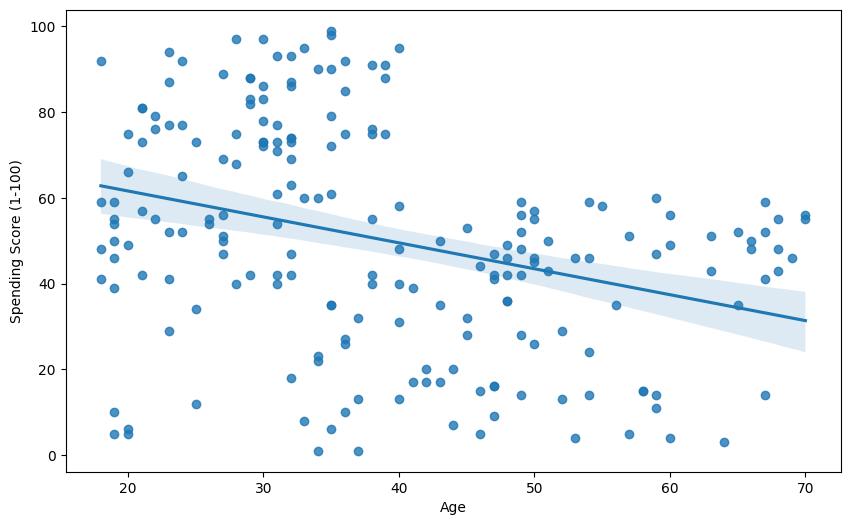

In [26]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'Age' , y = 'Spending Score (1-100)' , data = df)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Age')
plt.show()

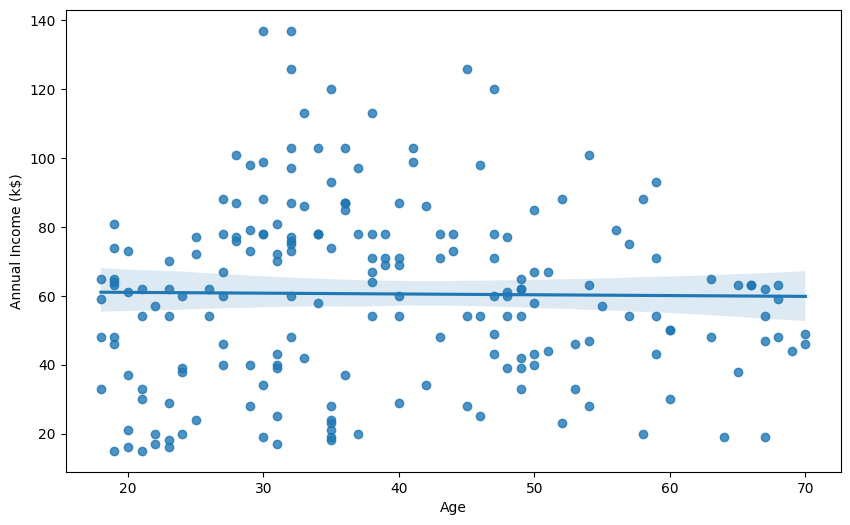

In [27]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'Age' , y = 'Annual Income (k$)' , data = df)
plt.ylabel('Annual Income (k$)')
plt.xlabel('Age')
plt.show()

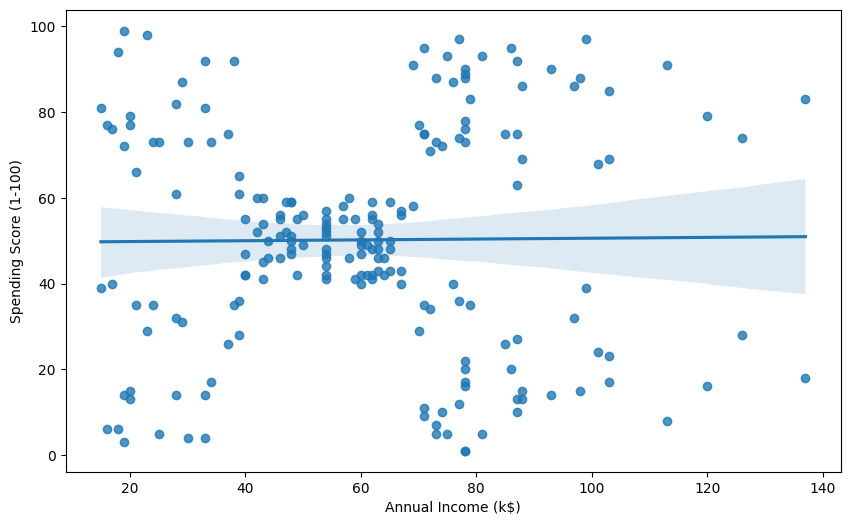

In [28]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'Annual Income (k$)' , y = 'Spending Score (1-100)' , data = df)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.show()

# Modeling

In [37]:
### Feature sleection for the model

X = df.iloc[:, [3,4]].values

In [38]:
wcss = []

for i in range(1,11):
  kmeans =KMeans(n_clusters = i, init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

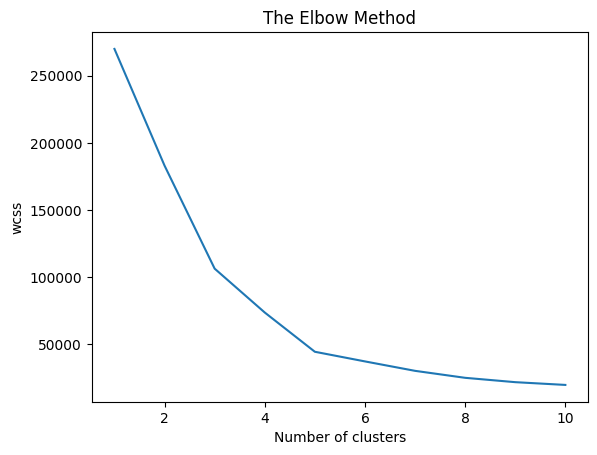

In [40]:
#Visualizing the ELBOW method to get the optimal value of K
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

From elbow method, we can see the best K value is 5.

In [41]:
#Build model
kmeansmodel = KMeans(n_clusters= 5, init='k-means++')
y_kmeans= kmeansmodel.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


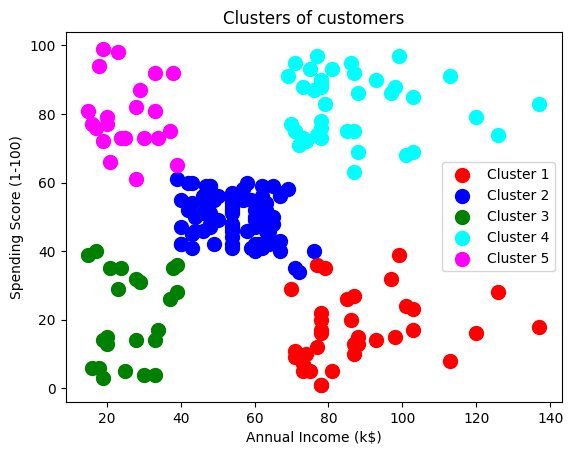

In [43]:
#Visualizing all the clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()



K-Means algorithm generated the following 5 clusters:

- clients with high annual income and low spending score -> Cluster 1
- clients with medium annual income and medium spending score -> Cluster 2
- clients with low annual income and low spending score -> Cluster 3
- clients with high annual income and high spending score -> Cluster 4
- clients with low annual income and high spending score -> Cluster 5

